In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
### Checking data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df["age"].unique()

array([69, 66, 65, 64, 63, 61, 60, 59, 58, 56, 52, 51, 45, 42, 40, 38, 34,
       74, 71, 70, 62, 57, 55, 54, 50, 49, 48, 46, 44, 41, 35, 29, 76, 68,
       67, 53, 47, 43, 39, 37, 77])

In [6]:
### Checking for missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
df["condition"].unique()

array([0, 1])

In [9]:
### Dropping the sex attribute
### The sex feature is not very useful in this example, as the sex of the person is not related
df.drop("sex", axis=1, inplace=True)

In [10]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,0,110,211,0,2,144,1,1.8,1,0,0,0


In [11]:
### Also dropping the fbs attribute
df.drop("fbs", axis=1, inplace=True)

In [12]:
df.head()

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,2,131,0,0.1,1,1,0,0
1,69,0,140,239,0,151,0,1.8,0,2,0,0
2,66,0,150,226,0,114,0,2.6,2,0,0,0
3,65,0,138,282,2,174,0,1.4,1,1,0,1
4,64,0,110,211,2,144,1,1.8,1,0,0,0


In [13]:
### Dropping the restecg attribute
df.drop("restecg", axis=1, inplace=True)

In [14]:
df.head()

,age,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,0,160,234,131,0,0.1,1,1,0,0
1,69,0,140,239,151,0,1.8,0,2,0,0
2,66,0,150,226,114,0,2.6,2,0,0,0
3,65,0,138,282,174,0,1.4,1,1,0,1
4,64,0,110,211,144,1,1.8,1,0,0,0


#### I have done some data cleaning and the data is pretty ready for training

In [15]:
### Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

In [16]:
### Dividing the dataset into dependent and independent features
X = df.drop("condition", axis=1)
y = df["condition"]

In [17]:
X.info()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   cp        297 non-null    int64  
 2   trestbps  297 non-null    int64  
 3   chol      297 non-null    int64  
 4   thalach   297 non-null    int64  
 5   exang     297 non-null    int64  
 6   oldpeak   297 non-null    float64
 7   slope     297 non-null    int64  
 8   ca        297 non-null    int64  
 9   thal      297 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 297 entries, 0 to 296
Series name: condition
Non-Null Count  Dtype
--------------  -----
297 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB
None


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [19]:
#### Data Preprocessing with StandardScaler
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

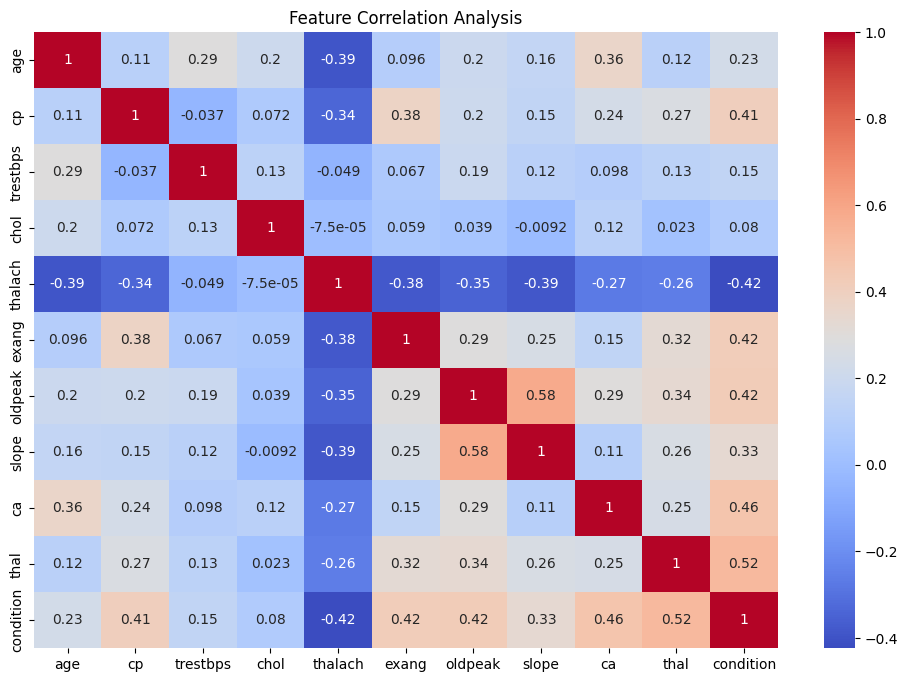

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Analysis')
plt.show()

In [ ]:
x_train.shape
print(y_train.shape)

(207,)
(207, 10)


In [114]:
### Model Selection
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight="balanced")

In [115]:
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [116]:
y_pred = model.predict(x_test_scaled)

In [117]:
print(y_pred)

[1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0]


In [118]:
#### Performance Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

0.8222222222222222
[[40  8]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.81      0.81      0.81        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



#### Hyperparameter Tuning and Cross Validation

In [94]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
params = dict(penalty = penalty, C = c_values, solver = solver)

In [96]:
#### Using the GridSearchCV method
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [97]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring="accuracy")

In [98]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [123]:
grid.fit(x_train_scaled, y_train)

c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease Prediction\Newenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\Documents\VS Code Files\Personal Machine Learning Projects\Heart Disease 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [51]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}

In [124]:
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test_scaled)
y_prob = best_model.predict_proba(x_test_scaled)[:,1]

In [102]:
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

0.8444444444444444
[[43  5]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.87      0.79      0.82        42

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



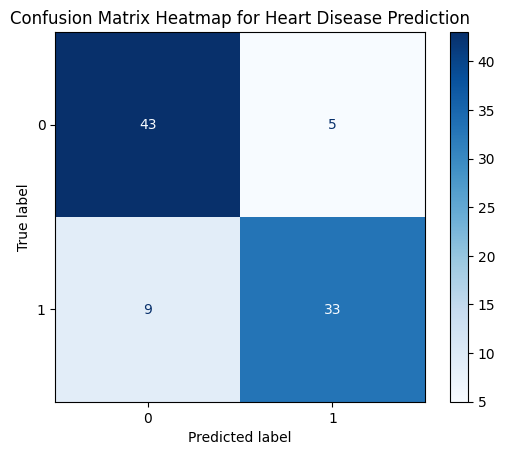

In [103]:
### Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Heatmap for Heart Disease Prediction")
plt.show()

In [104]:
### ROC_Curve and AUC Score
from sklearn.metrics import roc_curve, roc_auc_score

In [110]:
### Computing the ROC Score
dummy_model_auc = roc_auc_score(y_test, y_prob)
model_auc = roc_auc_score(y_test, y_prob)

print(dummy_model_auc)
print(model_auc)

0.8953373015873016
0.8953373015873016


In [106]:
dummy_model_prob = [0 for _ in range(len(y_test))]      ### We created a dummy model with 0 as the default output
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [107]:
### ROC Curve
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, y_prob)
print(thresholds)

[       inf 0.99432054 0.93927793 0.93603191 0.87558241 0.86287397
 0.83300709 0.82336209 0.78366721 0.74888454 0.66747485 0.6312797
 0.50490659 0.46700781 0.45339908 0.41993733 0.40721402 0.35961171
 0.33844997 0.32472453 0.31032363 0.24935145 0.24023992 0.17794915
 0.14949054 0.14232101 0.14208183 0.03119357]


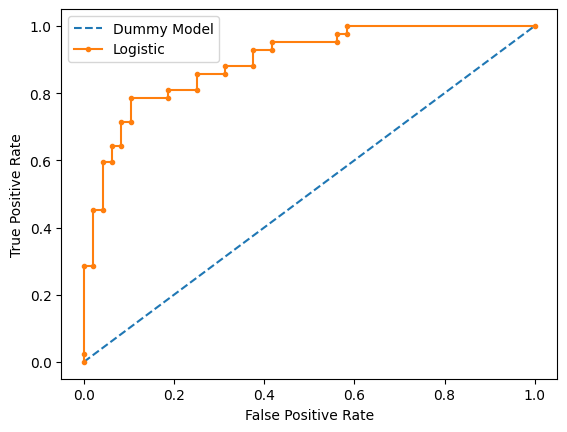

In [108]:
plt.plot(dummy_fpr, dummy_tpr, linestyle = '--', label= 'Dummy Model')
plt.plot(model_fpr, model_tpr, marker = '.', label= 'Logistic')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [125]:
import pickle

pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(best_model, open('model.pkl', 'wb'))

In [ ]:
##### Using the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier